In [1]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [2]:
class FashionMNIST(d2l.DataModule):  #@save
    """The Fashion-MNIST dataset."""
    def __init__(self, batch_size=64, resize=(28, 28)):
        super().__init__()
        self.save_hyperparameters()
        trans = transforms.Compose([transforms.Resize(resize), transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(root=self.root, train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(root=self.root, train=False, transform=trans, download=True)

In [44]:
data = FashionMNIST(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

In [4]:
data.train[0][0].shape

torch.Size([1, 32, 32])

In [5]:
print(data.train)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )


In [6]:
@d2l.add_to_class(FashionMNIST)  #@save
def text_labels(self, indices):
    """Return text labels."""
    labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [labels[int(i)] for i in indices]

In [7]:
@d2l.add_to_class(FashionMNIST)  #@save
def get_dataloader(self, train):
    data = self.train if train else self.val
    return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=self.num_workers)

In [8]:
X, y = next(iter(data.train_dataloader()))
print(X.shape, X.dtype, y.shape, y.dtype)

torch.Size([64, 1, 32, 32]) torch.float32 torch.Size([64]) torch.int64


In [9]:
print(X[0][0][0:2][:]), print(y)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0078, 0.0039, 0.0000, 0.0000, 0.0235, 0.0863, 0.1451, 0.1608, 0.1882,
         0.0863, 0.0157, 0.0000, 0.0039, 0.0078, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0353, 0.1294, 0.1843, 0.1451, 0.2706, 0.3608, 0.2039,
         0.2000, 0.1882, 0.0941, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])
tensor([4, 7, 0, 5, 4, 7, 3, 9, 4, 8, 5, 1, 2, 7, 0, 0, 4, 6, 2, 5, 0, 7, 7, 7,
        3, 1, 5, 4, 2, 8, 6, 3, 0, 5, 8, 7, 6, 3, 6, 3, 3, 9, 7, 2, 8, 1, 0, 6,
        0, 0, 5, 9, 8, 5, 0, 0, 5, 8, 2, 0, 6, 9, 6, 9])


(None, None)

In [10]:
tic = time.time()
for X, y in data.train_dataloader():
    continue
f'{time.time() - tic:.2f} sec'

'8.74 sec'

In [11]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """Plot a list of images."""
    raise NotImplementedError

In [12]:
@d2l.add_to_class(FashionMNIST)  #@save
def visualize(self, batch, nrows=3, ncols=9, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

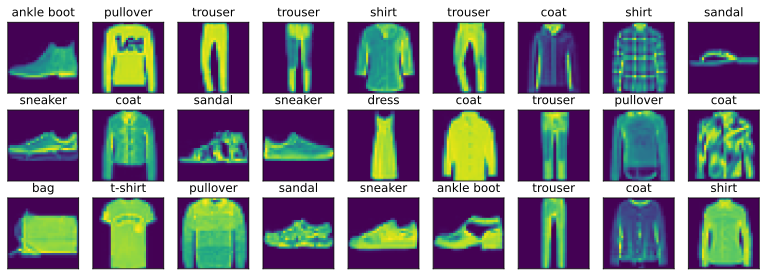

In [13]:
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

In [14]:
import torch
from d2l import torch as d2l

class Classifier(d2l.Module):  #@save
    """The base class of classification models."""
    def validation_step(self, batch):
        Y_hat = self(*batch[:-1])
        self.plot('loss', self.loss(Y_hat, batch[-1]), train=False)
        self.plot('acc', self.accuracy(Y_hat, batch[-1]), train=False)

In [15]:
@d2l.add_to_class(d2l.Module)  #@save
def configure_optimizers(self):
    return torch.optim.SGD(self.parameters(), lr=self.lr)

In [16]:
@d2l.add_to_class(Classifier)  #@save
def accuracy(self, Y_hat, Y, averaged=True):
    """Compute the number of correct predictions."""
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    preds = Y_hat.argmax(axis=1).type(Y.dtype)
    compare = (preds == Y.reshape(-1)).type(torch.float32)
    return compare.mean() if averaged else compare

In [17]:
#Softmax Regression Implementation from Scratch
import torch
from d2l import torch as d2l
X = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
X.sum(0, keepdims=True), X.sum(1, keepdims=True)

(tensor([[5., 7., 9.]]),
 tensor([[ 6.],
         [15.]]))

In [18]:
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1, keepdims=True)
    return X_exp / partition  # The broadcasting mechanism is applied here

In [19]:
X = torch.rand((2, 5))
X_prob = softmax(X)
X, X.sum(1), X_prob, X_prob.sum(1)

(tensor([[0.8816, 0.1670, 0.7683, 0.0931, 0.7407],
         [0.1347, 0.7612, 0.4521, 0.1966, 0.6722]]),
 tensor([2.6506, 2.2168]),
 tensor([[0.2699, 0.1321, 0.2410, 0.1227, 0.2344],
         [0.1424, 0.2665, 0.1957, 0.1515, 0.2438]]),
 tensor([1.0000, 1.0000]))

In [20]:
class SoftmaxRegressionScratch(d2l.Classifier):
    #28x28=784, 10 classes, weights constitute a  784x10 matrix plus a 1x10 row vector for the biases
    def __init__(self, num_inputs, num_outputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.W = torch.normal(0, sigma, size=(num_inputs, num_outputs), requires_grad=True)
        self.b = torch.zeros(num_outputs, requires_grad=True)

    def parameters(self):
        return [self.W, self.b]

In [21]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def forward(self, X):
    X = X.reshape((-1, self.W.shape[0]))
    return softmax(torch.matmul(X, self.W) + self.b)

In [22]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [23]:
torch.log(y_hat[list(range(len(y_hat))), y])

tensor([-2.3026, -0.6931])

In [24]:
def cross_entropy(y_hat, y):
    return -torch.log(y_hat[list(range(len(y_hat))), y]).mean()

cross_entropy(y_hat, y)

tensor(1.4979)

In [25]:
@d2l.add_to_class(SoftmaxRegressionScratch)
def loss(self, y_hat, y):
    return cross_entropy(y_hat, y)

In [26]:
print(dir(SoftmaxRegressionScratch))

['T_destination', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_call_impl', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_name', '_load_from_state_dict', '_maybe_warn_non_full_backward_hook', '_named_members', '_register_load_state_dict_pre_hook', '_register_state_dict_hook', '_replicate_for_data_parallel', '_save_to_state_dict', '_slow_forward', '_version', 'accuracy', 'add_module', 'apply', 'apply_init', 'bfloat16', 'buffers', 'call_super_init', 'children', 'configure_optimizers', 'cpu', 'cuda', 'double', 'dump_patches', 'eval', 'extra_repr', 'float', 'forward', 'get_buffer', 'get_extra_state'

In [27]:
print(SoftmaxRegressionScratch.__dict__)

{'__module__': '__main__', '__init__': <function SoftmaxRegressionScratch.__init__ at 0x00000230A2120720>, 'parameters': <function SoftmaxRegressionScratch.parameters at 0x00000230A2120860>, '__doc__': None, 'forward': <function forward at 0x00000230A21211C0>, 'loss': <function loss at 0x00000230A2123600>}


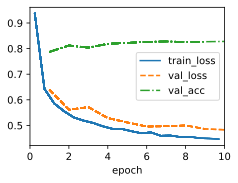

In [29]:
import torch
from d2l import torch as d2l

data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)

In [30]:
print(batch),print(type(batch))
Y_hat = batch[:-1]
print(type(Y_hat)), print(Y_hat[0].shape)
print(batch[-1])

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [31]:
print(dir(data))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'batch_size', 'get_dataloader', 'get_tensorloader', 'hparams', 'num_workers', 'resize', 'root', 'save_hyperparameters', 'text_labels', 'train', 'train_dataloader', 'val', 'val_dataloader', 'visualize']


In [32]:
print(data.__dict__)

{'hparams': {'batch_size': 256, 'resize': (28, 28)}, 'root': '../data', 'num_workers': 4, 'batch_size': 256, 'resize': (28, 28), 'train': Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           ), 'val': Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )}


In [33]:
print(vars(data))

{'hparams': {'batch_size': 256, 'resize': (28, 28)}, 'root': '../data', 'num_workers': 4, 'batch_size': 256, 'resize': (28, 28), 'train': Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           ), 'val': Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: Compose(
               Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
           )}


'155.48 sec'

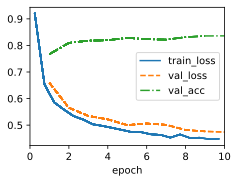

In [34]:
tic = time.time()
data = d2l.FashionMNIST(batch_size=256)
print(data.train[0][0].shape)
model = SoftmaxRegressionScratch(num_inputs=784, num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)
f'{time.time() - tic:.2f} sec'

In [35]:
X, y = next(iter(data.val_dataloader()))
z=model(X)
print(z.shape)
preds = model(X).argmax(axis=1)
preds.shape

torch.Size([256, 10])


torch.Size([256])

38


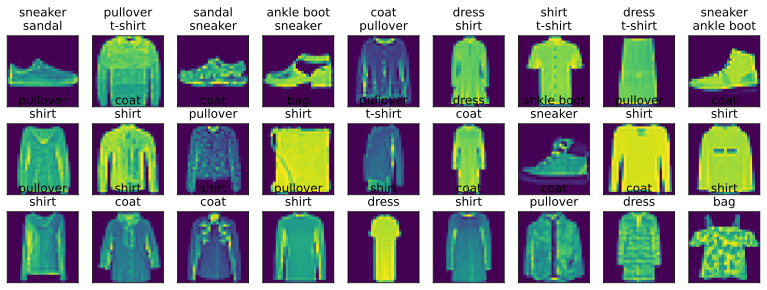

In [45]:
wrong = preds.type(y.dtype) != y
print(len(wrong))
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
data.visualize([X, y], labels=labels)

In [37]:
def visualize1(self, nrows=7, ncols=5, labels=[]):
    X, y = batch
    if not labels:
        labels = self.text_labels(y)
    d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

38


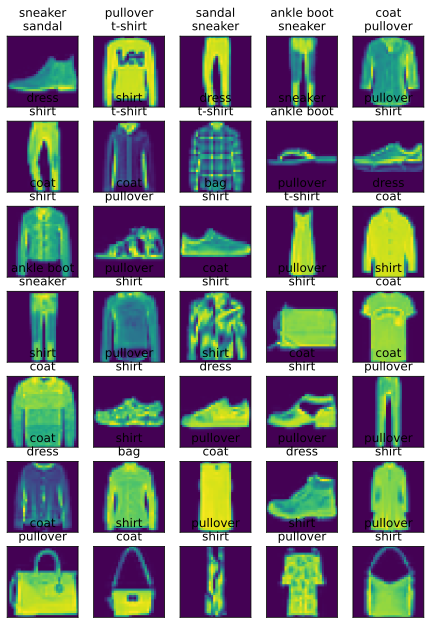

In [38]:
wrong = preds.type(y.dtype) != y
print(len(wrong))
X, y, preds = X[wrong], y[wrong], preds[wrong]
labels = [a+'\n'+b for a, b in zip(
    data.text_labels(y), data.text_labels(preds))]
visualize1([X, y], labels=labels)

In [39]:
#Concise Implementation of Softmax Regression
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [40]:
class SoftmaxRegression(d2l.Classifier):  #@save
    """The softmax regression model."""
    def __init__(self, num_outputs, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_outputs))

    def forward(self, X):
        return self.net(X)

In [41]:
@d2l.add_to_class(d2l.Classifier)  #@save
def loss(self, Y_hat, Y, averaged=True):
    Y_hat = Y_hat.reshape((-1, Y_hat.shape[-1]))
    Y = Y.reshape((-1,))
    return F.cross_entropy(Y_hat, Y, reduction='mean' if averaged else 'none')

'148.94 sec'

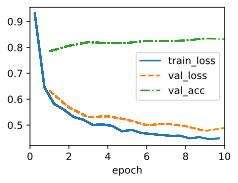

In [42]:
tic = time.time()		
data = d2l.FashionMNIST(batch_size=256)
model = SoftmaxRegression(num_outputs=10, lr=0.1)
trainer = d2l.Trainer(max_epochs=10)
trainer.fit(model, data)		
f'{time.time() - tic:.2f} sec'

In [ ]:
more image data set
https://www.kaggle.com/datasets?tags=14102-Image
https://pytorch.org/vision/stable/datasets.html

https://github.com/gskielian/JPG-PNG-to-MNIST-NN-Format try if this works?
https://stackoverflow.com/questions/46555025/making-your-own-set-of-mnist-data-identical-to-mnist-format
https://hanxiao.io/2017/08/26/Fashion-MNIST-a-Drop-In-Replacement-of-MNIST-for-Benchmarking-Machine-Learning-Algorithms/
https://github.com/Arlen0615/Convert-own-data-to-MNIST-format/blob/master/convert_to_mnist_format.py
https://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/#example-1-part-2-loading-mnist-into-numpy-arrays
https://androidkt.com/extract-images-from-mnist-idx3-ubyte-file-format-in-python/

.idx3-ubyte 转png 格式
https://blog.csdn.net/qq_35705332/article/details/100019249

https://www.image-net.org/challenges/LSVRC/index.php
https://blog.csdn.net/qq_36665989/article/details/119947229
https://zhuanlan.zhihu.com/p/430747166
https://www.kaggle.com/